# Navigating the Real Estate Market: An Analysis of Sales Trends by City, Neighborhood, and Property Type

In [1]:
# Let me first import the pandas library 
import pandas as pd

In [2]:
# Let me now load the Excel file
real_estate_sales = pd.read_excel(r'C:\Users\Mr. Seedball\Desktop\Data_immersion\Achievement_6\Real_estate_sales.xlsx')

In [3]:
# To see the dataframe overview
real_estate_sales

,Sale Date,City,Neighborhood,Property Type,Number of Bedrooms,Sale Price ($),Square Footage
0,2023-01-01,New York,Rural Area,House,4,779601,1257
1,2023-01-02,Miami,Suburb,Condo,1,934372,2295
2,2023-01-03,New York,Downtown,Condo,1,576154,2143
3,2023-01-04,Miami,Suburb,House,1,806465,523
4,2023-01-05,Los Angeles,Suburb,House,4,292122,1739
...,...,...,...,...,...,...,...
1495,2027-02-04,Miami,Rural Area,House,2,699980,4482
1496,2027-02-05,New York,Rural Area,Condo,1,641729,1744
1497,2027-02-06,Los Angeles,Suburb,House,4,130716,4386
1498,2027-02-07,Miami,Downtown,House,3,686463,4512


In [4]:
# Checking for missing values in the dataset
missing_values = real_estate_sales.isnull().sum()

In [6]:
# Displaying the missing values count for each column
print(missing_values)

Sale Date             0
City                  0
Neighborhood          0
Property Type         0
Number of Bedrooms    0
Sale Price ($)        0
Square Footage        0
dtype: int64


In [7]:
# Assessing the general quality by getting a concise summary of the dataframe
data_quality = real_estate_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Sale Date           1500 non-null   datetime64[ns]
 1   City                1500 non-null   object        
 2   Neighborhood        1500 non-null   object        
 3   Property Type       1500 non-null   object        
 4   Number of Bedrooms  1500 non-null   int64         
 5   Sale Price ($)      1500 non-null   int64         
 6   Square Footage      1500 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 82.2+ KB


In [8]:
# Displaying the general information about the dataframe
print(data_quality)

None


In [9]:
# Checking for duplicate rows
duplicates = real_estate_sales.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [10]:
# Converting "Sale Date" to datetime format
real_estate_sales['Sale Date'] = pd.to_datetime(real_estate_sales['Sale Date'])

In [11]:
# Ensuring "Number of Bedrooms" is of integer type
real_estate_sales['Number of Bedrooms'] = real_estate_sales['Number of Bedrooms'].astype(int)

In [12]:
# Getting the statistical summary of the numerical columns
statistical_summary = real_estate_sales.describe()

In [13]:
# Displaying the statistical summary
print(statistical_summary)

                 Sale Date  Number of Bedrooms  Sale Price ($)  Square Footage
count                 1500         1500.000000     1500.000000     1500.000000
mean   2025-01-19 12:00:00            2.536000   545403.799333     2723.574000
min    2023-01-01 00:00:00            1.000000   100903.000000      500.000000
25%    2024-01-10 18:00:00            2.000000   316589.500000     1648.750000
50%    2025-01-19 12:00:00            3.000000   552751.500000     2666.000000
75%    2026-01-29 06:00:00            4.000000   766978.250000     3814.750000
max    2027-02-08 00:00:00            4.000000   999497.000000     4999.000000
std                    NaN            1.119616   261582.340666     1289.566266


In [14]:
# Overview of the dataset after cleaning
real_estate_sales.head()

,Sale Date,City,Neighborhood,Property Type,Number of Bedrooms,Sale Price ($),Square Footage
0,2023-01-01,New York,Rural Area,House,4,779601,1257
1,2023-01-02,Miami,Suburb,Condo,1,934372,2295
2,2023-01-03,New York,Downtown,Condo,1,576154,2143
3,2023-01-04,Miami,Suburb,House,1,806465,523
4,2023-01-05,Los Angeles,Suburb,House,4,292122,1739


The dataset is now cleaned (no missing values, no duplicates, excellent formatting) and ready for statistical analysis. Data quality is also topnotch!

## Key questions (Qs) to answer in this project

### Q1: What is the average sale price of properties in different cities?

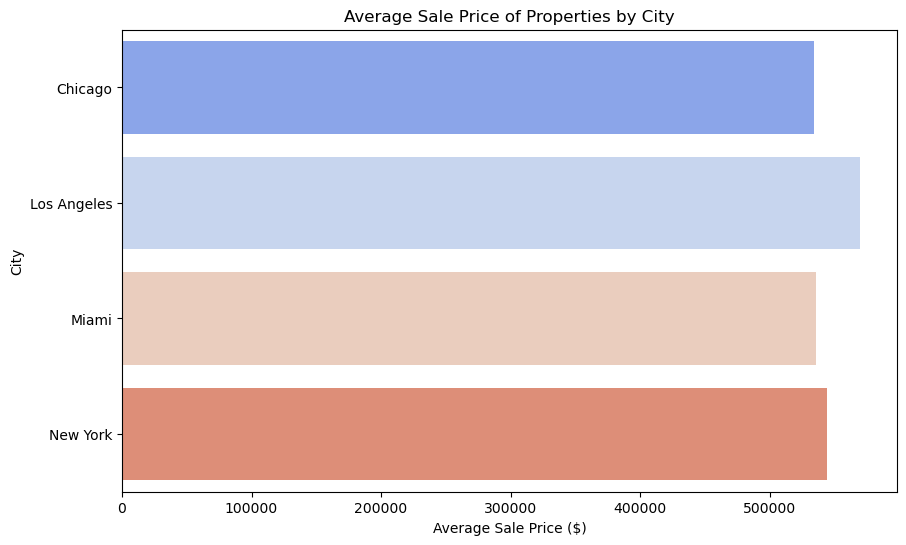

In [15]:
# Importing the right libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the average sale price per city
average_sale_price_by_city = real_estate_sales.groupby('City')['Sale Price ($)'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Sale Price ($)', y='City', data=average_sale_price_by_city, palette='coolwarm')
plt.title('Average Sale Price of Properties by City')
plt.xlabel('Average Sale Price ($)')
plt.ylabel('City')
plt.show()

In [16]:
# To see the mean values by city
average_sale_price_by_city = real_estate_sales.groupby('City')['Sale Price ($)'].mean().reset_index()

print(average_sale_price_by_city)

          City  Sale Price ($)
0      Chicago   534039.109551
1  Los Angeles   569504.494220
2        Miami   535935.425791
3     New York   544366.307494


Average sale price varies by city in the order: Los Angeles (569504.49USD) > New York (544366.31USD) > Miami (535935.43USD) > Chicago (534039.10USD). This variation most likely reflects the city's overall cost of living, demand for real estate, or other economic factors.

### Q2: How does the property type affect the sale price?

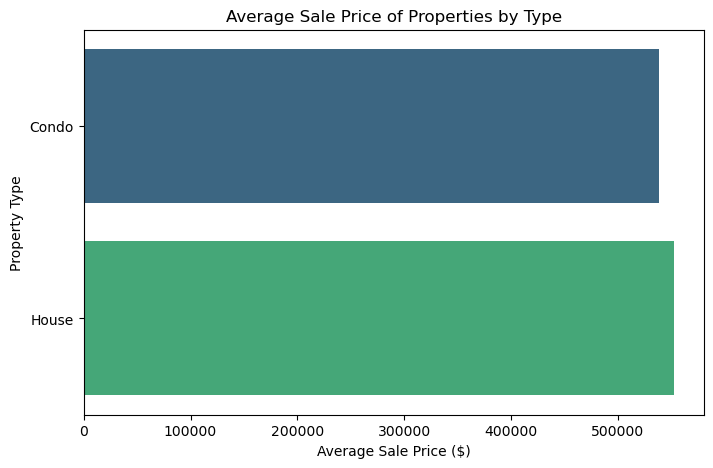

In [17]:
# Calculating the average sale price per property type
average_sale_price_by_type = real_estate_sales.groupby('Property Type')['Sale Price ($)'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='Sale Price ($)', y='Property Type', data=average_sale_price_by_type, palette='viridis')
plt.title('Average Sale Price of Properties by Type')
plt.xlabel('Average Sale Price ($)')
plt.ylabel('Property Type')
plt.show()

In [18]:
# To see the means of property types
average_sale_price_by_type = real_estate_sales.groupby('Property Type')['Sale Price ($)'].mean().reset_index()

print(average_sale_price_by_type)

  Property Type  Sale Price ($)
0         Condo   538725.758398
1         House   552523.363636


Houses are more expensive (552523.36USD) than condominiums (538725.76USD). Investors pay about 13798USD more for houses. This could be as a result of complete privacy that comes with houses compared to partial privacy in shared appartments (condos).

### Q3: Compare sale price by number of bedrooms

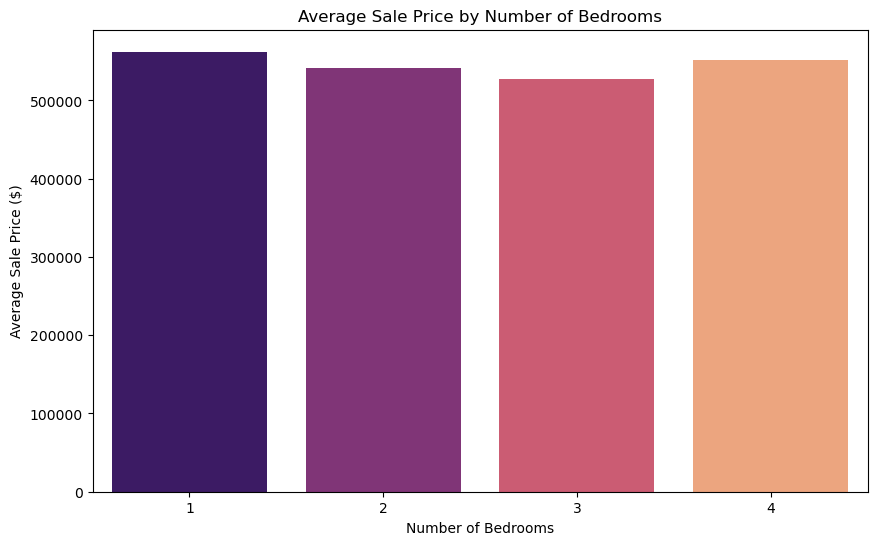

In [19]:
# Calculating the average sale price by the number of bedrooms
average_sale_price_by_bedrooms = real_estate_sales.groupby('Number of Bedrooms')['Sale Price ($)'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Bedrooms', y='Sale Price ($)', data=average_sale_price_by_bedrooms, palette='magma')
plt.title('Average Sale Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Sale Price ($)')
plt.show()

There is no pattern in the bar chart; it shows that the number of bedrooms does not affect sale price. 

### Q4: Does square footage correlate with the sale price across different property types?

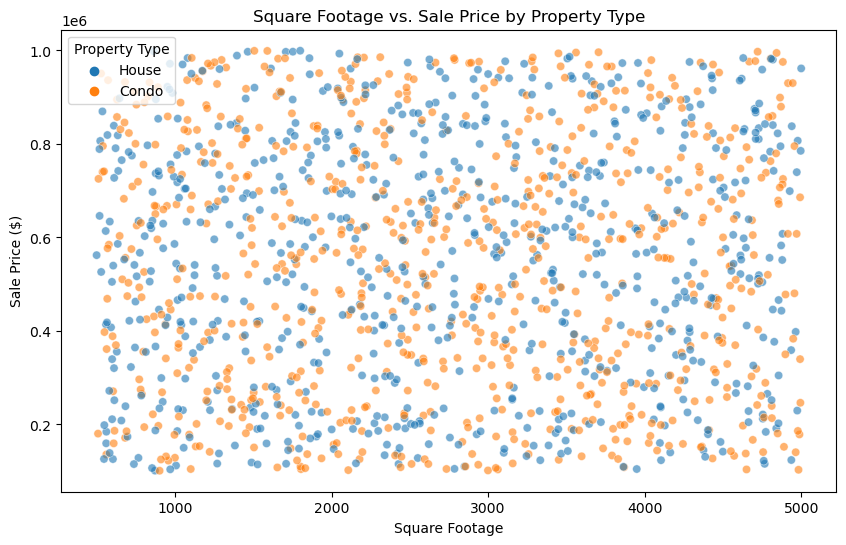

In [20]:
# Scatter plot for square footage vs. sale price, colored by property type
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Square Footage', y='Sale Price ($)', hue='Property Type', data=real_estate_sales, alpha=0.6)
plt.title('Square Footage vs. Sale Price by Property Type')
plt.xlabel('Square Footage')
plt.ylabel('Sale Price ($)')
plt.legend(title='Property Type')
plt.show()

In [21]:
# Importing the sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Identifying the predictor and response
X = real_estate_sales[['Square Footage']]  # Predictor
y = real_estate_sales['Sale Price ($)']    # Response

# Fitting the model rightly
model = LinearRegression().fit(X, y)

# Predictions
y_pred = model.predict(X)

# Calculating the R^2 value
r2_value = r2_score(y, y_pred)

print(f"The R^2 value for the relationship between square footage and sale price is: {r2_value}")

The R^2 value for the relationship between square footage and sale price is: 0.00015070104338110735


R^2 of 0.00015 shows a too weak relationship! Square footage does not affect sale price of property type (house and condos)

### Q5: Are certain neighborhoods more popular or expensive than others?

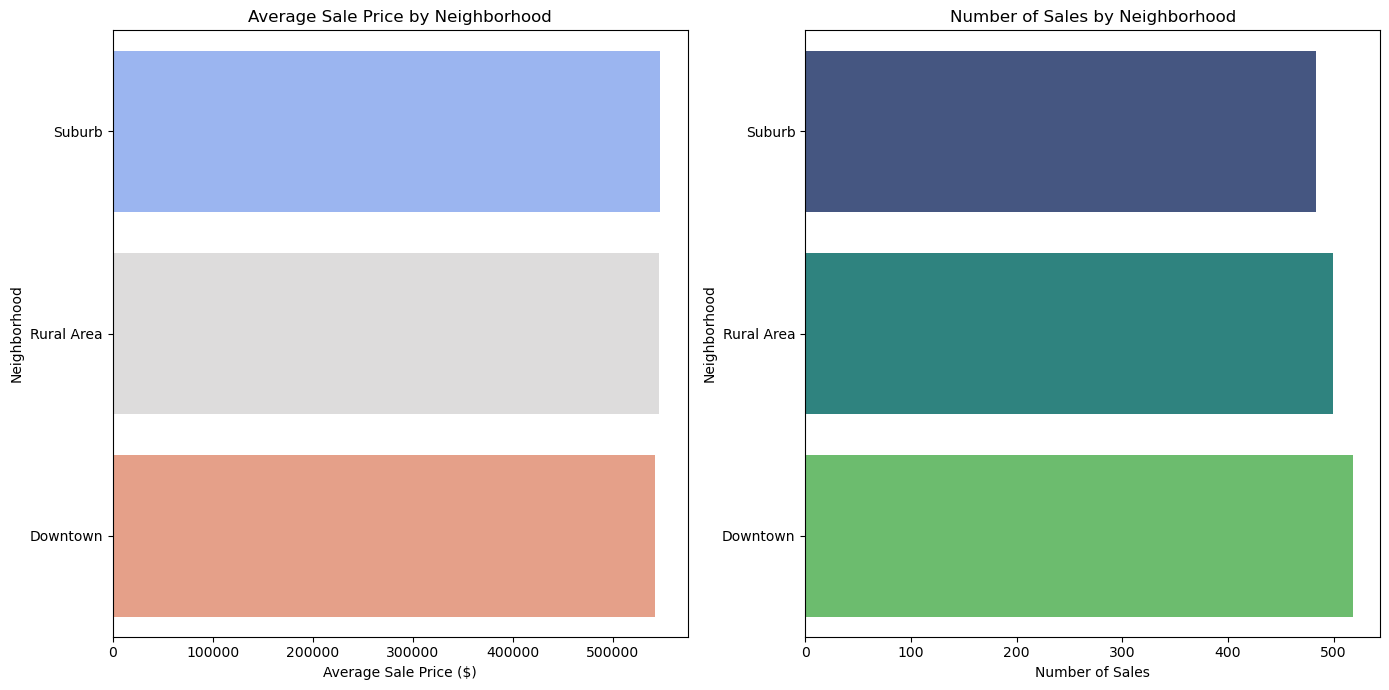

In [22]:
# Grouping the data by Neighborhood to find average sale price and count of sales
neighborhood_stats = real_estate_sales.groupby('Neighborhood').agg(
    Average_Sale_Price = ('Sale Price ($)', 'mean'),
    Number_of_Sales = ('Sale Date', 'count')
).reset_index()

# Sorting the DataFrame by Average Sale Price for better visualization
neighborhood_stats_sorted_by_price = neighborhood_stats.sort_values(by='Average_Sale_Price', ascending=False)

# Plotting
plt.figure(figsize=(14, 7))

# Plot for average sale price
plt.subplot(1, 2, 1)
sns.barplot(x='Average_Sale_Price', y='Neighborhood', data=neighborhood_stats_sorted_by_price, palette='coolwarm')
plt.title('Average Sale Price by Neighborhood')
plt.xlabel('Average Sale Price ($)')
plt.ylabel('Neighborhood')

# Plot for number of sales
plt.subplot(1, 2, 2)
sns.barplot(x='Number_of_Sales', y='Neighborhood', data=neighborhood_stats_sorted_by_price, palette='viridis')
plt.title('Number of Sales by Neighborhood')
plt.xlabel('Number of Sales')
plt.ylabel('Neighborhood')

plt.tight_layout()
plt.show()

In [23]:
# To see the averages of the direct comparison
neighborhood_stats_sorted_by_price

,Neighborhood,Average_Sale_Price,Number_of_Sales
2,Suburb,547411.915114,483
1,Rural Area,546568.038076,499
0,Downtown,542409.832046,518


**Suburb** and **Rural Area** have identical average sales of 547,412USD and 546,568USD. For **Downtown**, this is slightly lower, about 542,410USD.

**Downtown**: has the highest number of sales with a total of 518 transactions, closely followed by **Rural Area** with 499 sales. **Suburb** records slightly fewer sales than rural areas, with a total of 483 transactions.

Downtown areas are usually the most popular in terms of the number of sales due to a higher demand or preference for living in downtown areas. Suburban areas are slightly more expensive on average than rural and downtown areas due to development. This is perhaps the reason downtown areas may be preferred for their location. Note that suburban areas command a slightly higher price, possibly due to larger property sizes or other factors. The minimal price difference between rural areas and downtown suggests that the choice between these areas might be influenced more by individual lifestyle preferences than cost.

### Q6: How do sale prices fluctuate over time?

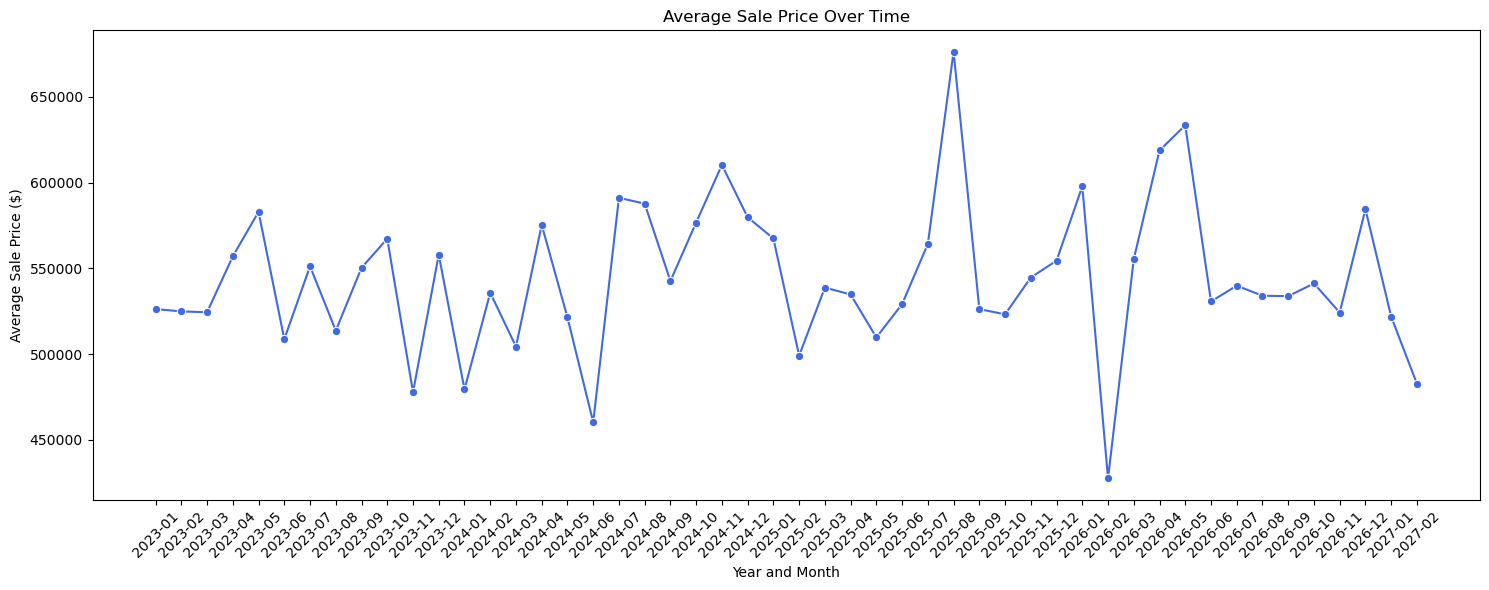

In [24]:
# Extracting year and month for grouping since daily might be too granular for trend analysis
real_estate_sales['YearMonth'] = real_estate_sales['Sale Date'].dt.to_period('M')

# Grouping by the new YearMonth column
price_trend = real_estate_sales.groupby('YearMonth').agg(Average_Sale_Price = ('Sale Price ($)', 'mean')).reset_index()

# Converting YearMonth back to string for plotting
price_trend['YearMonth'] = price_trend['YearMonth'].astype(str)

# Plotting
plt.figure(figsize=(15, 6))
sns.lineplot(data=price_trend, x='YearMonth', y='Average_Sale_Price', marker='o', color='royalblue')
plt.xticks(rotation=45)
plt.title('Average Sale Price Over Time')
plt.xlabel('Year and Month')
plt.ylabel('Average Sale Price ($)')
plt.tight_layout()
plt.show()

There were periods of increase **(> 650,000USD)** and decrease **(< 450,000USD)** in property values as shown in average sale prices.

The lowest average sale price observed was **427,550.5USD** in February 2026 (assuming it's in the past considering my data). The highest average sale price observed was **676,353.94USD** in August 2025. The standard deviation of **44,043.13USD** in the average sale prices over the observed period shows high variability. In terms of market volatility, the significant difference between the minimum and maximum average sale prices of **248,805USD** and the standard deviation of **44,043.13USD** shows notable volatility in the real estate market over the period observed. This variability could be influenced by economic factors, market demand, and seasonal trends.

**Investment Insight**: The peak average sale price in August 2025 could indicate a period of high demand or other favorable market conditions for sellers. On the other hand, the lower average sale price in February 2026 might represent a more advantageous buying opportunity. 

### Q7: Is there a difference in the size of properties (square footage) among cities?

In [28]:
# To analyze the difference in the size of properties among cities, I need to group the data by city
# Secondly, I need to calculate average square footage, minimum, and maximum square footage for properties in each city.
city_square_footage_stats = real_estate_sales.groupby('City').agg(Average_Square_Footage = ('Square Footage', 'mean'), Min_Square_Footage = ('Square Footage', 'min'), Max_Square_Footage = ('Square Footage', 'max')).reset_index()

city_square_footage_stats

,City,Average_Square_Footage,Min_Square_Footage,Max_Square_Footage
0,Chicago,2641.994382,509,4977
1,Los Angeles,2728.158960,512,4974
2,Miami,2625.447689,500,4999
3,New York,2898.731266,529,4996


New York properties have the highest average square footage. This could reflect the types of properties sold in New York or a preference for larger properties within the city.

Each city shows a wide range in property sizes, from just over 500 sq ft to nearly 5,000 sq ft; the market is just diverse. For isntance, the differences in average square footage among the cities may reflect varying market conditions, property types prevalent in each city, and urban vs. suburban living spaces. 

### Q8: What is the distribution of property types within each neighborhood?

In [30]:
# To analyze the distribution of property types within each neighborhood, I have to create a cross-tabulation of neighborhoods and property types
property_type_distribution = pd.crosstab(real_estate_sales['Neighborhood'], real_estate_sales['Property Type'])

property_type_distribution

Property Type,Condo,House
Neighborhood,,
Downtown,263,255
Rural Area,270,229
Suburb,241,242


The distribution between condos and houses is nearly even in downtown areas, with a slight preference for condos. This could reflect the urban environment where condos are popular due to their convenience and the lifestyle they offer.
 
Rural areas have a slightly higher number of condos (270) than houses (229). This distribution is interesting and somewhat unexpected, as rural areas are typically associated with more houses due to the availability of land. This could indicate a trend towards developing more condo units in rural settings or perhaps a broader definition of what constitutes a "rural" area in this project. 
Suburban neighborhoods show an almost equal split between condos and houses i.e., 241 vs 242. The market seems to be balanced and caters to various preferences and family sizes.

# Please see my presentation slides for more detailed information